# Gabarito do Trabalho Individual

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('auto-mpg.csv')

<h3>Listando as primeiras linhas</h3>

In [3]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<h2>Análise Exploratória de Dados</h2>
<h3>Análise básica do conteúdo</h3>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [49]:
df[df.index==32]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_nn
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto,104.469388


In [5]:
from sklearn.impute import SimpleImputer

imputer_hp = SimpleImputer(strategy='mean')
novos_valores_hp = imputer_hp.fit_transform(df[['horsepower']])
novos_valores_hp

array([[130.        ],
       [165.        ],
       [150.        ],
       [150.        ],
       [140.        ],
       [198.        ],
       [220.        ],
       [215.        ],
       [225.        ],
       [190.        ],
       [170.        ],
       [160.        ],
       [150.        ],
       [225.        ],
       [ 95.        ],
       [ 95.        ],
       [ 97.        ],
       [ 85.        ],
       [ 88.        ],
       [ 46.        ],
       [ 87.        ],
       [ 90.        ],
       [ 95.        ],
       [113.        ],
       [ 90.        ],
       [215.        ],
       [200.        ],
       [210.        ],
       [193.        ],
       [ 88.        ],
       [ 90.        ],
       [ 95.        ],
       [104.46938776],
       [100.        ],
       [105.        ],
       [100.        ],
       [ 88.        ],
       [100.        ],
       [165.        ],
       [175.        ],
       [153.        ],
       [150.        ],
       [180.        ],
       [170

In [6]:

df['horsepower_nn'] = novos_valores_hp

In [7]:
df[df.index==32]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_nn
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto,104.469388


In [16]:
atributos_numericos   = ['cylinders','displacement','horsepower','horsepower_nn','weight','acceleration']
atributos_categoricos = ['model year','origin']

In [17]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [9]:
df['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

In [59]:
df['car name'].value_counts()

ford pinto                           6
toyota corolla                       5
ford maverick                        5
amc matador                          5
peugeot 504                          4
                                    ..
pontiac astro                        1
plymouth horizon miser               1
oldsmobile cutlass ciera (diesel)    1
chevrolet camaro                     1
plymouth custom suburb               1
Name: car name, Length: 305, dtype: int64

<h3>Calculando e imprimindo medidas estatísticas sobre todas as colunas numéricas</h3>

In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower_nn
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,104.469388
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,38.199187
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,46.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,76.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,95.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,125.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,230.000000


<h3>Calculando e imprimindo histogramas sobre todas as colunas numéricas</h3>

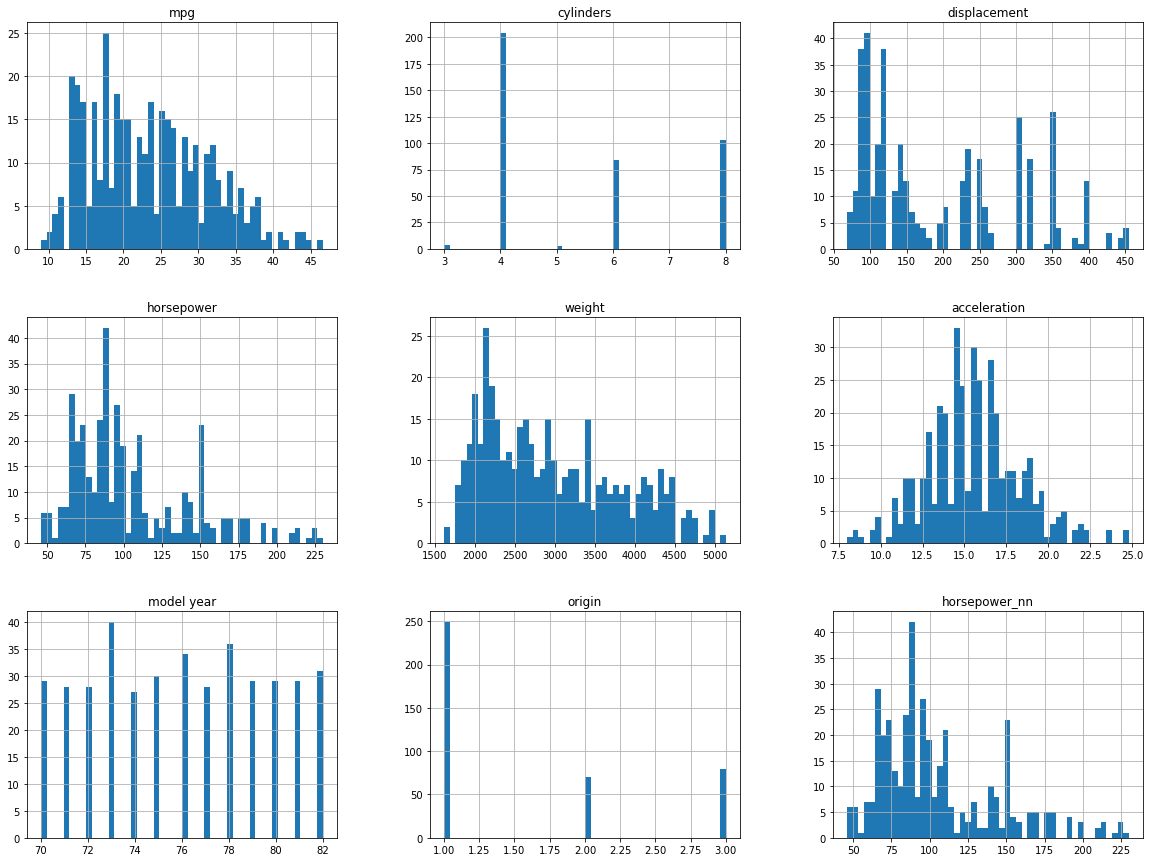

In [18]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

## Analisando correlações entre colunas numéricas
### Gráficos de dispersão comparando todas as colunas entre si

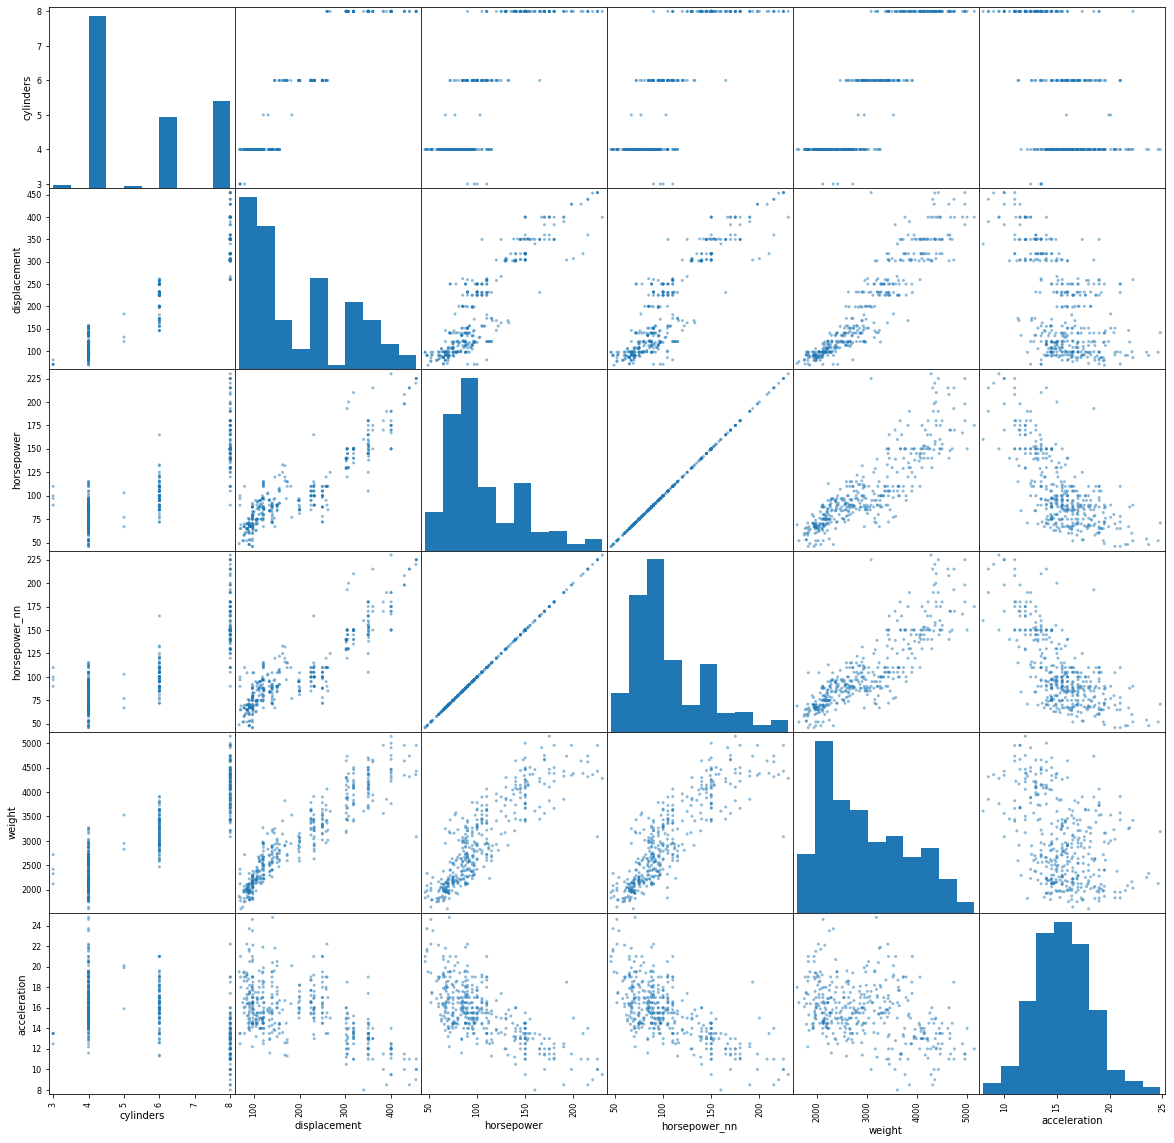

In [19]:
pd.plotting.scatter_matrix(df[atributos_numericos],figsize=(20, 20))
plt.show()

### Analisando pares de colunas com correlações interessantes
#### Correlação entre <i>atemp</i> e <i>temp</i>

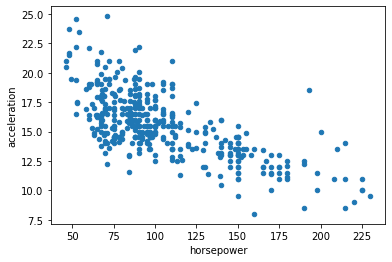

In [19]:
df.plot(x='horsepower', y='acceleration', kind='scatter')
plt.show()

In [20]:
df[['horsepower','acceleration']]

,horsepower,acceleration
0,130.0,12.0
1,165.0,11.5
2,150.0,11.0
3,150.0,12.0
4,140.0,10.5
...,...,...
393,86.0,15.6
394,52.0,24.6
395,84.0,11.6
396,79.0,18.6


In [12]:
import scipy.stats as stats

r, p = stats.pearsonr(df['horsepower_nn'].values, df['acceleration'].values)
r

nan

### Automatizando um pouco a análise para conjuntos grandes de colunas

#### Calculando uma matríz de correlações entre as colunas preditivas numéricas escolhidas

In [20]:
import numpy as np

corr = np.corrcoef(df[atributos_numericos],rowvar=False)
corr

array([[ 1.        ,  0.95072139,         nan,  0.83893937,  0.8960168 ,
        -0.50541949],
       [ 0.95072139,  1.        ,         nan,  0.89364624,  0.93282415,
        -0.54368408],
       [        nan,         nan,         nan,         nan,         nan,
                nan],
       [ 0.83893937,  0.89364624,         nan,  1.        ,  0.8605743 ,
        -0.68425913],
       [ 0.8960168 ,  0.93282415,         nan,  0.8605743 ,  1.        ,
        -0.41745732],
       [-0.50541949, -0.54368408,         nan, -0.68425913, -0.41745732,
         1.        ]])

#### Criando um <i>dataframe pandas</i> para facilitar a visualização da matríz de correlações

In [21]:
dfcorr = pd.DataFrame(corr,index=atributos_numericos,columns=atributos_numericos)
dfcorr

,cylinders,displacement,horsepower,horsepower_nn,weight,acceleration
cylinders,1.000000,0.950721,NaN,0.838939,0.896017,-0.505419
displacement,0.950721,1.000000,NaN,0.893646,0.932824,-0.543684
horsepower,NaN,NaN,NaN,NaN,NaN,NaN
horsepower_nn,0.838939,0.893646,NaN,1.000000,0.860574,-0.684259
weight,0.896017,0.932824,NaN,0.860574,1.000000,-0.417457
acceleration,-0.505419,-0.543684,NaN,-0.684259,-0.417457,1.000000


#### Exportando a matríz de correlações para um arquivo <i>.csv</i> visando análise no Excel

In [23]:
dfcorr.to_csv('correlmat.csv',sep=';',decimal=',')

### Pré-processamento

#### Separando um conjunto de dados para teste


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

#### Separando o atributo alvo dos atributos preditivos

In [26]:
df_treino_labels = df_treino['mpg'].copy()
df_treino        = df_treino.drop(columns='mpg')

In [28]:
df_treino.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_nn
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,150.0
18,4,97.0,88.0,2130,14.5,70,3,datsun pl510,88.0
376,4,91.0,68.0,2025,18.2,82,3,mazda glc custom l,68.0
248,4,91.0,60.0,1800,16.4,78,3,honda civic cvcc,60.0
177,4,115.0,95.0,2694,15.0,75,2,audi 100ls,95.0


#### Eliminando atributos desnecessários
<p><b>Alguns atributos são apeanas identificadores que não carregam informação alguma.</b> No nosso estudo de caso o atributo <i>instant</i> é apenas um identificador.</p>
<p><b>Alguns atributos podem conter informações não disponíveis no momento em que precisarmos fazer previsões.</b> No nosso estudo de caso os atributos <i>casual</i> e <i>registered</i> representam as quantidades de alugueis de usuários casuais (não-registrados) e registrados na plataforma de aluguel, logo, só serão conhecidos ao final do dia, assim como a coluna alvo (<i>cnt</i>), que representa a quantidade total de aluguéis feitos no dia. Além disto, como a coluna alvo é a soma dos atributos <i>casual</i> e <i>registered</i>, se soubessemos o valores destes atributos, não precisaríamos de um modelo preditivo, pois bastaria somá-los para obter o valor exato de <i>cnt</i>. Assim, mantê-los na base de treinos seria uma forma de trapacear o processo de avaliação fazendo previsões estremamente precisas com o uso de informação privilegiada que na prática não estará disponível para fazer previsões quando o modelo for adotado em um ambiente de produção.</p>
<p><b>Alguns atributos podem conter informações que não se repetirão no futuro</b>. No nosso estudo de caso os atributos <i>dteday</i> e <i>yr</i> são exemplos de informações meramente cronológica que não se repetirão no futuro. O atributo <i>dteday</i> até poderia ser útil para extração de informações sazonais, como mês ou estação do ano, se já não tivessemos estas informações na base de dados, mas não é este o caso, portanto pode sim ser descartado.</p>
<p>Por fim, <b>alguns pares de atributos podem ser fortemente correlacionados entre si</b>, situação na qual poderíamos descartar um deles. No nosso estudo de caso os atributos <i>temp</i> e <i>atemp</i> são fortemente correlacionados (Pearson's r=0,9917). Assim, escolheremos arbitrariamente <i>atemp</i> para ser descartado.</p>

In [27]:
df_treino = df_treino.drop(columns=['car name','cylinders','weight','horsepower_nn'])
df_teste  = df_teste.drop( columns=['car name','cylinders','weight','horsepower_nn'])
atributos_numericos               =['displacement','horsepower','acceleration']

In [28]:
df_treino

,displacement,horsepower,acceleration,model year,origin
3,304.0,150.0,12.0,70,1
18,97.0,88.0,14.5,70,3
376,91.0,68.0,18.2,82,3
248,91.0,60.0,16.4,78,3
177,115.0,95.0,15.0,75,2
...,...,...,...,...,...
71,70.0,97.0,13.5,72,3
106,350.0,180.0,12.5,73,1
270,134.0,95.0,14.8,78,3
348,89.0,62.0,17.3,81,3


#### Lidando com dados ausentes
<p>Neste estudo de caso em particular não temos dados ausentes nas colunas, logo não precisamos tratar esta situação. Porém, se tivessemos dados ausentes, precisaríamos lidar com isto, pois nossos modelos não aceitariam linhas/datapoints/observações incompletas. Quando alguma coluna não está integralmente preenchida, temos três opções para lidar com o problema:<br>
1 - Apagar as linhas incompletas;<br>
2 - Apagar as colunas que possuem dados ausentes;<br>
3 - Preencher as linhas incompletas com algum valor, como zero, ou a média da coluna, ou a médiana da coluna, por exemplo.</p>
<p>Os exemplos de código abaixo poderiam ser utilizados para as opções 1 e 2, respectivamente, se a coluna <i>season</i> estivesse vazia em algumas linhas:</p>

In [31]:
# df_treino.dropna(subset=['season']) # ou esta instrução para apagar linhas sem valor em season 
                                     # delete from df_treino where season is null
    
# df_treino.drop('season',axis=1)     # ou esta instrução para apagar a coluna inteira
                                     # alter table df_treino drop column season

O exemplo abaixo poderia ser utilizado para preencher os valores ausentes com as média das colunas, se as colunas <i>season</i> ou <i>mnth</i> estivessem vazias em algumas linhas. Depois, bastaria acrescentar a matríz <b>novos_valores</b> na matríz <b>X</b> que criaremos logo a seguir.

In [29]:
from sklearn.impute import SimpleImputer

imputer_hp = SimpleImputer(strategy='mean')
novos_valores_hp = imputer_hp.fit_transform(df_treino[['horsepower']])
df_treino['horsepower'] = novos_valores_hp

#### Ajustando a escala dos atributos numéricos quantitativos
<p>No nosso estudo de caso todos os atributos numéricos quantitativos (<i>temp</i>, <i>hum</i> e <i>windspeed</i>) já tiveram sua escala préviamente ajustada. Assim, o código mostrado abaixo é meramente ilustrativo do que precisaríamos fazer para ajustá-los, mas não é estritamente necessário.</p>
<p>Além disto, a partir daqui começaremos a contruir nossa matríz de atributos preditivos pré-processados, que chamaremos de <b>X_treino</b>.</p>

In [30]:
nomes_atributos           = atributos_numericos

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(df_treino[atributos_numericos])

StandardScaler()

In [33]:
scaler.mean_

array([191.90408805, 103.28434505,  15.63993711])

In [34]:
scaler.scale_

array([102.82175033,  37.00695555,   2.75892081])

In [38]:
X = scaler.transform(df_treino[atributos_numericos])
X

array([[ 1.0901965 ,  1.26234796, -1.31933367],
       [-0.92299623, -0.41301277, -0.41318225],
       [-0.98134964, -0.95345171,  0.92792185],
       [-0.98134964, -1.16962729,  0.27549283],
       [-0.74793599, -0.22385913, -0.23195197],
       [ 2.02385109,  1.93789664, -1.31933367],
       [-1.10778204, -1.38580287,  1.36287453],
       [-0.91327066, -1.03451755,  1.83407327],
       [-0.92299623, -0.41301277,  1.2178903 ],
       [ 2.30589259,  2.55940143, -1.50056395],
       [ 2.02385109,  2.34322585, -1.24684155],
       [-1.18558659, -0.0887494 , -1.13810338],
       [-0.73821043, -0.76429808, -0.05072168],
       [-1.09805647, -1.22367118,  1.07290607],
       [-0.34918768,  0.12742618, -0.05072168],
       [-0.84519168, -1.08856145, -0.34069014],
       [-0.55342462, -0.52110055,  0.1305086 ],
       [ 0.38022998,  0.31657981, -0.08696774],
       [-0.34918768,  0.04636034, -0.44942831],
       [ 1.22635446,  1.26234796, -0.59441253],
       [-0.91327066, -1.0074956 , -0.449

#### Binarizando atributos categóricos (<i>One Hot Encoding</i>)

In [35]:
df_treino.head()

,displacement,horsepower,acceleration,model year,origin
3,304.0,150.0,12.0,70,1
18,97.0,88.0,14.5,70,3
376,91.0,68.0,18.2,82,3
248,91.0,60.0,16.4,78,3
177,115.0,95.0,15.0,75,2


In [36]:
from sklearn.preprocessing import LabelBinarizer

#### Automatizando um pouco o processo de binarização

In [37]:
for atrb_name in atributos_categoricos:
    # binarizando a coluna de nome atrb_name
    lb = LabelBinarizer()
    dados = lb.fit_transform(df_treino[atrb_name].values)
    
    # acrescentando a matriz com as novas colunas na matriz X
    X = np.concatenate((X, dados),axis=1)
    
    # criando nomes para as novas colunas no seguinte formato: nome_do_atributo=valor_do_atributo
    nomes_novos_atributos = []
    for class_name in lb.classes_:
        nomes_novos_atributos = np.append(nomes_novos_atributos,atrb_name+'='+str(class_name))
        
    # acrescentando os nomes das novas colunas na lista completa do dataset
    nomes_atributos = np.append(nomes_atributos,nomes_novos_atributos)
    
    print('Nome do atributo categórico: ',atrb_name)
    print('Classes aprendidas: ',lb.classes_)
    print('Nomes dos novos atributos: ',nomes_novos_atributos)
    print("Primeiras 5 linhas dos dados: ")
    print(dados[0:5,])
    print()

NameError: name 'X' is not defined

In [42]:
nomes_atributos

array(['displacement', 'horsepower', 'acceleration', 'model year=70',
       'model year=71', 'model year=72', 'model year=73', 'model year=74',
       'model year=75', 'model year=76', 'model year=77', 'model year=78',
       'model year=79', 'model year=80', 'model year=81', 'model year=82',
       'origin=1', 'origin=2', 'origin=3'], dtype='<U32')

#### Visualizando o resultado final do pré-processamento
Agora podemos visualizar o resultado final do pré-processamento. Isto não é estritamente necessário, mas permitirá uma melhor compreeensão dos dados que serão utilizados para treinamento de um modelo. Note que nossa matríz <b>X</b> pura é difícil de visualizar no Jupyter Notebook em virtude da grande quantidade de colunas, mas se criarmos um dataframe pandas a visualização ficará mais fácil.</p>
<p>Primeiras duas linhas da matríz <b>X</b>:</p>

In [43]:
X[0:2]

array([[ 1.0901965 ,  1.26234796, -1.31933367,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.92299623, -0.41301277, -0.41318225,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

In [44]:
df_treino_preproc = pd.DataFrame(X,columns=nomes_atributos)
df_treino_preproc.head()

,displacement,horsepower,acceleration,model year=70,model year=71,model year=72,model year=73,model year=74,model year=75,model year=76,model year=77,model year=78,model year=79,model year=80,model year=81,model year=82,origin=1,origin=2,origin=3
0,1.090196,1.262348,-1.319334,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.922996,-0.413013,-0.413182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.981350,-0.953452,0.927922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.981350,-1.169627,0.275493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.747936,-0.223859,-0.231952,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
